## MINIPROYECTO PANDAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("attacks.csv",encoding = "ISO-8859-1")  #abro el domumento con la codificacion adecuada.

In [3]:
#lO PRIMERO QUE VOY A HACER ES QUEDARME CON LAS COLUMNAS QUE CREO QUE VOY A NECESITAR
#PARA REDUCIR MI DATAFRAME LO MÁXIMO POSIBLE.
#PARA ELLO, DEBO COMPROBAR LAS COLUMNAS DE MI DATAFRAME
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
df = df[["Case Number","Date","Year","Country","Area","Activity","Sex ","Age","Injury","Fatal (Y/N)","Species "]]
df
#ahora tenemos todo mejor visualizado, habiendo quitado las columnas que no nos interesan para nada.


,Case Number,Date,Year,Country,Area,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,2018.06.25,25-Jun-2018,2018.0,USA,California,Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.06.18,18-Jun-2018,2018.0,USA,Georgia,Standing,F,11,Minor injury to left thigh,N,NaN
2,2018.06.09,09-Jun-2018,2018.0,USA,Hawaii,Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.06.08,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Surfing,M,NaN,Minor injury to lower leg,N,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,MEXICO,Colima,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Lo siguiente que vamos a hacer es ver si hay algun caso duplicado ya que, si lo hay, nuestro estudio estadistico se podría
# ir al traste y no serviría para nada. Solo eliminaremos la fila del Case Number que se repita, y de la que se repita 
#las ultimas.
duplicadas = df.drop_duplicates("Case Number",keep = 'last')



## ANALISIS NUMERO DE ATAQUES POR PAIS


In [6]:
#lO QUE VAMOS A HACER A CONTINUACION ES LIMPIAR LOS DATOS DE LA COLUMNA COUNTRY PARA QUITAR LOS VALORES NULOS Y MOSTRAR
#EN UNA GRÁFICA EN QUE PAIS SE PRODUCEN MAS ATAQUES DE TIBURON.

In [7]:
#ELIMINAMOS LAS FILAS CON VALORES NULOS
country_limpio = df["Country"].dropna() #Con esto elimino las filas de los valores nulos de la columna country
                                     
country_limpio.isnull()
 #comprobamos que, efectivamente se han eliminado todas las filas con valores nulos.

0       False
1       False
2       False
3       False
4       False
        ...  
6297    False
6298    False
6299    False
6300    False
6301    False
Name: Country, Length: 6252, dtype: bool

In [8]:
#Vamos a hacer dos graficas para ver las proporciones de los paises que tiene más ataques de tiburón.
#Vamos a ver el top 3 de paises con más ataques de tiburón:
country_limpio.value_counts().head(3)




USA             2229
AUSTRALIA       1338
SOUTH AFRICA     579
Name: Country, dtype: int64

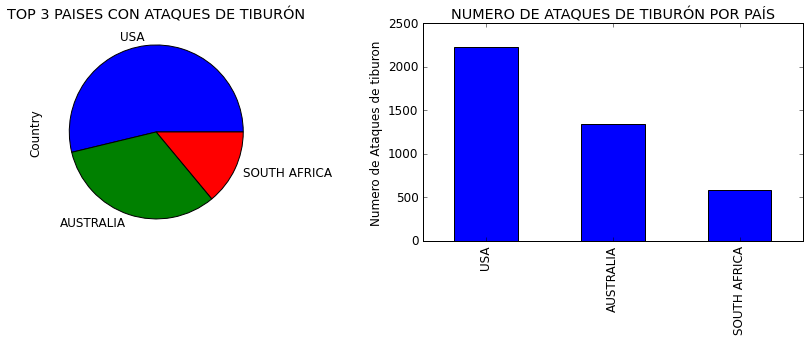

In [9]:
#Vamos a hacer una grafica circular para que se vean mejor los datos y su proporción respecto a cada país. 
#Haremos también una grafica de barras para verlo por recuento de ataques.
plt.figure(figsize = (15,4))
plt.style.use('classic')
plt.subplot(1,2,1)
country_limpio.value_counts().head(3).plot.pie()
plt.title("TOP 3 PAISES CON ATAQUES DE TIBURÓN")
plt.subplot(1,2,2)
country_limpio.value_counts().head(3).plot.bar()
plt.title("NUMERO DE ATAQUES DE TIBURÓN POR PAÍS")
plt.ylabel("Numero de Ataques de tiburon")
plt.show()




In [10]:
#Podemos resumir entonces, mediante estas dos gráficas, que Estados Unidos, es el país con más ataques de tiburón
#de todo el mundo, seguido de Australia, y el sur de Africa como el tercer país.

## -----

In [11]:
#Otra cosa que vamos a hacer es cambiar el nombre de las columnas que nos gustan, como por ejemplo, el de "Sex " para 
#quitar ese espacioy el de Fatal(Y/N) QUE ES HORRIBLE. Tambien Species que viene con otro espacio al final.
df.rename(columns={'Sex ':'Sex',
                   "Fatal (Y/N)":'Murieron',
                  "Species " : "Species"},
          inplace=True)

#¿mejor no?

In [12]:
#Como ya sabemos sobre que pais trabajar, en este caso Estados Unidos, vamos a reducir el data a todos los registros en los
#que aparezca Estados Unidos con todos los datos que vengan de este país y con las columnas que queramos trabajar.
#LO PRIMERO QUE VAMOS A HACER ES ELIMINAR TODOS LOS REGISTROS EN EL QUE NO SE ENCUENTRE USA.
df.drop(df[df["Country"] != "USA"].index,axis=0,inplace=True)

## SEGUIMOS CON LA LIMPIEZA DE DATOS

In [13]:
#A continuación, revisamos los valores nulos que hay en cada columna. Podemos comprobar que tanto hay valores nulos en 
#unas cuanta columnas. Vamos a eliminar las columnas que no necesitemos que tengan valores nulos. Como por ejemplo,
#las especies de tiburones, que la verdad, no es de mucho interés.
df.isnull().sum()
df.drop(['Species'], axis=1, inplace = True)

In [14]:
print(df.isnull().sum())
#Volvemos a mirar valores y vemos que en la columna de área solo hay 4, asique no haría falta eliminarlos, sino que
#que miraremos cual es el dato más repetido y lo colocaremos en el valor de los nulos.
df["Area"].describe()
#EN ESTE CASO Florida es dato que más se repite, por lo que sustituiremos los nulos por Florida.
df["Area"].fillna("Florida",inplace = True)

Case Number      1
Date             0
Year             0
Country          0
Area             4
Activity       134
Sex             98
Age            727
Injury           5
Murieron       188
dtype: int64


In [15]:
# A continuacion debemos mirar los tipos de datos que tenemos en cada columna. Y observamos que las columnas
#que deberian ser numéricas, son de tipo objeto como por ejemplo, Age.
df.dtypes
#Asique vamos a cambiar la columna de Age por un tipo de dato entero. Primero, para que no nos de error, debemos cambiar
#todos los nulos por 0
recuento = df["Age"].value_counts()

df["Age"].fillna(0,inplace = True)


In [16]:
df["Age"] = pd.to_numeric(df["Age"],errors = "coerce") #Con esto, convertimos a tipo entero toda la columna y que ademas, 
#nos evite los errores de tipo string que haya.

In [17]:
#Como no nos conviene que este tipo float, sino que sea tipo entero, ya que la edad solo puede ser de tipo entero,
#cambiamos el tipo de dato de la columna float a int.
#Antes nos cercionamos si sigue habiendo nulos.
df.Age.isnull().sum() #Podemos ver que sigue habiendo 36. Vamos a seguir eliminando.
df["Age"] = df["Age"].fillna(0)
df["Age"] = df["Age"].astype(int)

In [18]:
#Comprobamos que ahora la columna Age sin valores nulos es de tipo entero. Vamos a dejarlo asi de momento.
print(df["Age"].dtype)
print(df["Age"].isnull())

int32
0       False
1       False
2       False
7       False
8       False
        ...  
6249    False
6283    False
6288    False
6292    False
6299    False
Name: Age, Length: 2229, dtype: bool


## ANALISIS ATAQUES DE TIBURON A SURFEROS EN ESTADOS UNIDOS

In [19]:
df.isnull().sum()
#Vemos que hay valores nulos en actividades, pero solo nos queremos quedar con los que hacen surf, asique reducimos el 
#espectro.


Case Number      1
Date             0
Year             0
Country          0
Area             0
Activity       134
Sex             98
Age              0
Injury           5
Murieron       188
dtype: int64

In [20]:
df = df[(df['Activity'] == 'Surfing')]#Ahora tenemos 0 valores nulos en activity.


In [21]:
#En la columna Sex directamente podemos hacer una media y sustituir los valores nulos por la media.

In [22]:
df["Sex"].isnull().sum() # con esto vemos que solo hay 19 valores nulos asique no supondrá una gran diferencia
#sustituirlos por el valor mas repetido, que en este caso es M.
df["Sex"].describe() #Comprobamos que M esta en el top.
df["Sex"].fillna("M",inplace = True)

C:\Users\Adrian\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
df["Sex"].isnull().sum()#Vemos que ya no hay valores nulos.

0

In [24]:
df.isnull().sum()

Case Number     0
Date            0
Year            0
Country         0
Area            0
Activity        0
Sex             0
Age             0
Injury          4
Murieron       26
dtype: int64

In [25]:
df["Injury"].fillna("Foot bitten",inplace = True)#Hacemos lo mismo con la columna de injury y murieron.
df["Murieron"].fillna("N",inplace = True) #COMPROBAMOS OTRA VEZ QUE VALOR SE REPITE MÁS UTILIZANDO EL DESCRIBE.

In [26]:
print(df.isnull().sum()) #Ahora tenemos todo el DataFrame sin valores nulos.

Case Number    0
Date           0
Year           0
Country        0
Area           0
Activity       0
Sex            0
Age            0
Injury         0
Murieron       0
dtype: int64


In [27]:
#OTRA COSA QUE VAMOS A HACER ES CONVERTIR LA COLUMNA DE Year A TIPO ENTERO.
df["Year"] = df["Year"].astype(int)


<ipython-input-27-bf74e4a51b51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype(int)


In [28]:
#A estas alturas vamos a eliminar directamente dos columnas que tampoco nos interesan ya. Que ademas esta
#lleno de errores y no va a afectar a nuestro analisis posterior que veremos a continuacion.
df.drop(['Date',"Case Number"], axis=1, inplace = True)

C:\Users\Adrian\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
baja_varianza = [] #Comprobamos si los valores de las columnas no se repiten tanto como para descartarlas directamente.
                   #Se comprueba que el valor minimo no es igual al percentil, porque es el limite que ponemos para que 
                    #la columna se quede.
for col in df._get_numeric_data():
    minimo = min(df[col])
    percentil = np.percentile(df[col], 70)
    if percentil == minimo:
        baja_varianza.append(col)

In [30]:
baja_varianza #seguimos.

[]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 2 to 6201
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      564 non-null    int32 
 1   Country   564 non-null    object
 2   Area      564 non-null    object
 3   Activity  564 non-null    object
 4   Sex       564 non-null    object
 5   Age       564 non-null    int32 
 6   Injury    564 non-null    object
 7   Murieron  564 non-null    object
dtypes: int32(2), object(6)
memory usage: 35.2+ KB


In [32]:
print(set(df['Sex'])) #HEMOS OBSERVADO TODOS LOS SETS DE CADA COLUMNA Y NOS DIMOS CUENTA QUE EN LA COLUMNA DE SEX HAY 
# ALGO QUE NO VA. EL "lli". Reemplazamos por M que es el caracter que más se repite por el tema de la media. Ademas que 
#solo hay un "lli" asique no nos a a afectar apenas en nuesto analisis.
df['Sex'] = df['Sex'].str.replace('lli','M')



{'F', 'lli', 'M'}


<ipython-input-32-1e1ad8b57510>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].str.replace('lli','M')


In [33]:
print(set(df["Sex"]))#Ya no hay valores extraños.

{'F', 'M'}


In [34]:
descripcion = df["Age"].describe().astype(int)#Podemos ya ver ciertos datos interesantes como que la media de edad 
#en ataques de tiburon es de 21 años, o que la edad maxima en sufrir alguien un ataque es de 68 años.
descripcion


count    564
mean      21
std       14
min        0
25%       15
50%       20
75%       28
max       68
Name: Age, dtype: int32

In [35]:
df = df.sort_values("Age") #vamos a ordenar en orden ascendente la columna de Edad para ver los ceros que podemos eliminar.



In [36]:
zero = df[(df['Year'] == 0)] #Vimos que la columna de year y en la de Age coincide un cero, concretamente en la fila 6021.
                             #Asique la vamos a eliminar.                                 
zero = zero[["Year","Age"]]
zero
df.drop([6201],axis=0,inplace = True)

## TOP SURFISTAS MUERTOS POR AREA

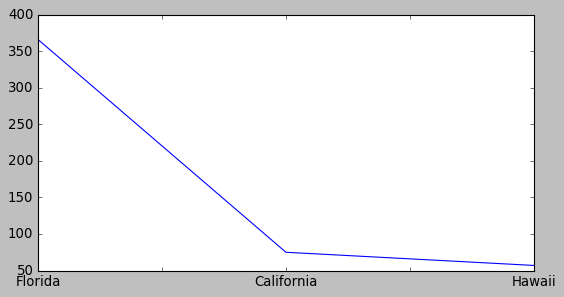

In [37]:
#Vamos a trabajar ahora con los datos que nos han dado.
#podemos ver cual es el top dentro de Area para ver donde se producen más ataques de tiburon.
top_area = df["Area"].value_counts().head(3)
plt.figure(figsize = (8,4))
plt.style.use('classic')
top_area.plot()

plt.show() #Podemos ver que de lejos donde se producen más ataques de tiburon es en Florida con mas de 350
#casos, seguido de california con menos de 100, y Hawaii con poco mas de 50.

## SURFISTAS MUERTOS EN ESTADOS UNIDOS.

N          552
Y            8
UNKNOWN      3
Name: Murieron, dtype: int64


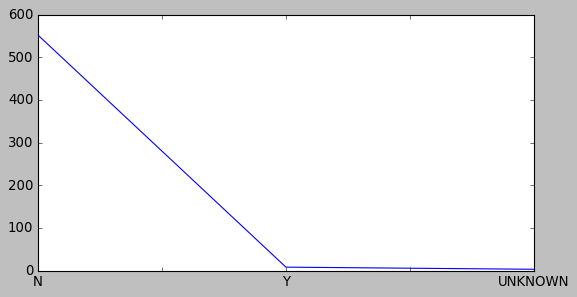

In [38]:
grafica_mueren = df["Murieron"].value_counts()
print(grafica_mueren)
plt.figure(figsize = (8,4))
plt.style.use('classic')
grafica_mueren.plot()
plt.show()
#comprobamos que el numero de surfistas muertos en Estados Unidos es muy bajo, 8 en total, despues, son 3 que no se sabe
#lo que les paso, y 552 que sobrevivieron.

In [39]:
muertes = df.groupby(["Area","Murieron"]).agg(['count', 'mean']).astype(int).head(7)
del muertes["Year"]
#Esta tabla es bastante interesante, nos da información sobre loss surfer@s que  murieron por ataques de tiburon en áreas
#diferentes. Podemos comprobar, que a pesar de que Florida, es la zona con mas ataques de tiburon, ninguno de ellos resulto
#fatal. Si podemos sacar también que la media de edad se sitúa en los 21 años, por lo que se produce entre la población 
#joven que hace surf estos ataques.

#Por otro lado vemos que en California, se sitúa en segundo lugar en cuanto a ataques, y que se produjeron dos muertes
#por ataque de tiburon. 

#Y sorprendentemente Hawai parece que es la zona con más ataques mortales de tiburon,5!!!! que a pesar de ser el tercero
#del top de ataques, es el que más muertes tiene, y más sorprendente aún, es que la media de edad se sitúa en los 11 años!
#¡Parece que no se vigila tanto a los niños por esa zona! nose...
print(muertes)


                      Age     
                    count mean
Area       Murieron           
California N           73   21
           Y            2   31
Florida    N          363   20
           UNKNOWN      3    5
Georgia    N            1   12
Hawaii     N           52   25
           Y            5   11


## RELACION DE GENERO RESPECTO A LAS MUERTES

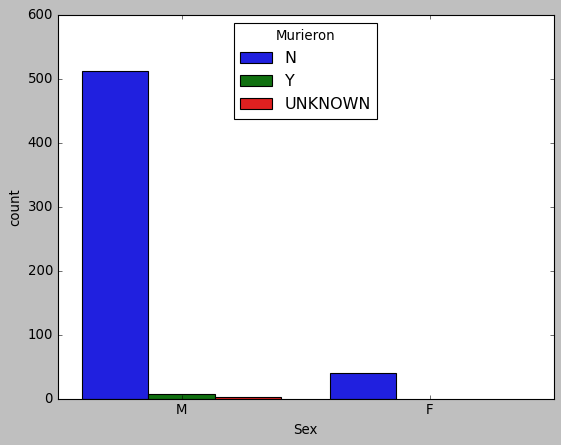

In [40]:
#Podemos ver la relacion de genero respecto a las muertes por ataques de tiburon no?
sns.countplot(x='Sex', hue='Murieron', data=df) #Podemos ver algo interesante en esta gráfica.
#Para empezar, se producen más ataques a surferos hombres que a mujeres, eso puede indicar que hay más surferos que 
#surferas en Estados Unidos, y las unicas muertes que hubo fueron en hombres, lógicamente al haber muchisimos más.
plt.show()

In [41]:
#¿cuanto más?
df["Sex"].value_counts() #------> 523 ataques a hombres y solo 40 a mujeres. 483 de diferencia.

M    523
F     40
Name: Sex, dtype: int64

## TOP 3 ATAQUES POR AREA A SURFISTAS EN EE.UU

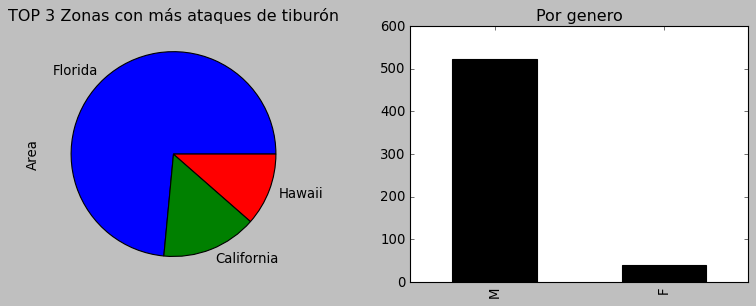

In [42]:
plt.figure(figsize = (12,4))
plt.style.use('classic')
plt.subplot(1,2,1)
df["Area"].value_counts().head(3).plot.pie()
plt.title("TOP 3 Zonas con más ataques de tiburón")
plt.subplot(1,2,2)
df["Sex"].value_counts().head(3).plot.bar(color = "black")
plt.title("Por genero")
plt.show()

#lO QUE ESTAMOS VIENDO EN LA PRIMERA GRAFICA CIRCULAR ES LA PROPORCION POR COLORES ENTRE LOS ATAQUES A SURFISTAS
#DONDE SE VE QUE LA ZONA DOMINANTE ES FLORIDA, DESPUES CALIFORNIA, SEGUIDO MUY DE CERCA POR HAWAII.

#EN LA OTRA GRAFICA VEMOS QUE LA PROPORCION DE ATAQUES A SURFEROS HOMBRES ES MUCHO MAYOR QUE EN MUJERES SURFISTAS.
#¿SERAN LOS HOMBRES MÁS TORPES? ¿MENOS CUIDADOSOS? O ES QUE HABRA MENOS CHICAS SURFISTAS...


## COMPARATIVA AREAS POR GENERO

In [43]:
#Ahora vamos a comparar por Areas y el genero, haber si dependiendo de la zona hay mas surfieros o surferas. Vamos a filtrar
#solo las areas del top de ataques, California, Florida y Hawaii.
values=["Florida","California","Hawaii"]
top_area = df[df.Area.isin(values)]#Con esto lo que hacemos es quedarnos solo con las filas del top que nos interesa
#que es el de California, Florida y Hawaii.


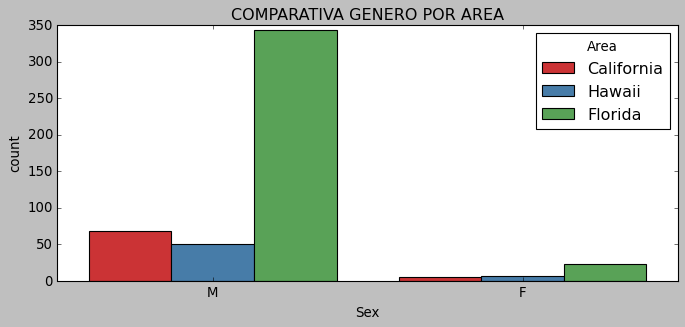

In [44]:
plt.figure(figsize = (10,4))
plt.style.use('classic')
plt.title("COMPARATIVA GENERO POR AREA")
sns.countplot(x='Sex', hue='Area', data=top_area, palette= "Set1")
plt.show()
#Podemos observar que hay muchos más ataques a surferos que a surferas en todos los territorios, y eso nos hace pensar
#cositas como las mencionadas anteriormente.

## ULTIMO ANALISIS - MUERTES EN LOS ULTIMOS 8 AÑOS

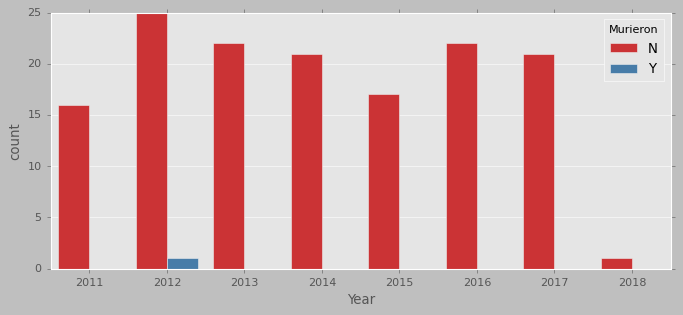

In [45]:
#Ahora vamos a comparar el numero de muertes en los ultimos años
muertes_año = df[df["Year"] > 2010]
plt.figure(figsize = (10,4))
plt.style.use('ggplot')
sns.countplot(x='Year', hue='Murieron', data=muertes_año, palette= "Set1")
plt.show()
#En esta grafica podemos observar que en los ultimos 8 años, teniendo en cuenta que nos encontramos en 2018, y no en 
#2020, el año en el que se produjeron más ataques a surferos fue en 2012, y que en 2018 se redujo drasticamente el numero de ataques.
#Casi todo fueron ataques, solo hubo un caso de muerte en 2012. Parece ser que en ese año se pusieron más las pilas 
#los que surfeaban.


In [47]:
#PODEMOS TERMINAR CON VER LA MEDIA DE EDAD EN LOS ULTIMOS 8 AÑOS
#PARA ELLO VAMOS A ELIMINAR LOS CEROS DEL COPÓN, AUNQUE NO SEA UNA MANERA MUY ORTODOXA DE TRABAJAR PERO NO SE ALEJARÁ MUCHO 
#DE LA REALIDAD TAMPOCO.
edades_ceros = df[(df["Year"] > 2010) & (df["Age"]>0)]
print(edades_ceros.mean().astype(int)) #Vemos por último que la media de edad en ataques a surfistas en los últimos
#8 años es de 27 años.

Year    2014
Age       27
dtype: int32


# RESUMEN ANALISIS

#### BUENO, PODEMOS DEDUCIR DE TODO ESTO ENTONCES, QUE EN ESTADOS UNIDOS HAY UN MAYOR NUMERO DE ATAQUES A SURFEROS QUE A SURFERAS, YA SEA EN FLORIDA CON EL MAYOR NUMERO DE CASOS, EN CALIFORNIA, NUESTRO SEGUNDO EN EL TOP, O HAWAII, EL TERCERO.  LA MAYORÍA DE ESOS ATAQUES ACABAN SIN VICTIMAS MORTALES EXCEPTUANDO ALGUN CASO, Y QUE EN LOS ULTIMOS 8 AÑOS SE HA MANTENIDO UNA MEDIA DE ATAQUES CONSTANTE HASTA EL ULTIMO EN 2018, QUE SE HA REDUCIDO DE UNA MANERA DESPROPORCIONADA.

## FIN